In [107]:
#100043
import alpaca_trade_api as tradeapi
#paper api
#api = tradeapi.REST('PK0LC2J1NSMU3IUAXF31', 'VpfhPftx0Wvmkn5PoOKabFcUUHrCSxQ8LF8dri3s', base_url='https://paper-api.alpaca.markets')

api = tradeapi.REST('AKYZUR3PABG4AH39LMUC','GyCiPu5SQXovKXLl4QLe2JbXcXNfCzomjNjiVAmT','https://api.alpaca.markets')

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CEG']: YFChartError('%ticker%: 1m data not available for startTime=1672549200 and endTime=1673154000. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:


['CEG']: YFChartError('%ticker%: 1m data not available for startTime=1673154000 and endTime=1673758800. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFChartError('%ticker%: 1m data not available for startTime=1672549200 and endTime=1673154000. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFChartError('%ticker%: 1m data not available for startTime=1673154000 and endTime=1673758800. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AVGO']: YFChartError('%ticker%: 1m data not available for startTime=1672549200 and endTime=1673154000. The requested range must be within the last 30 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AVG

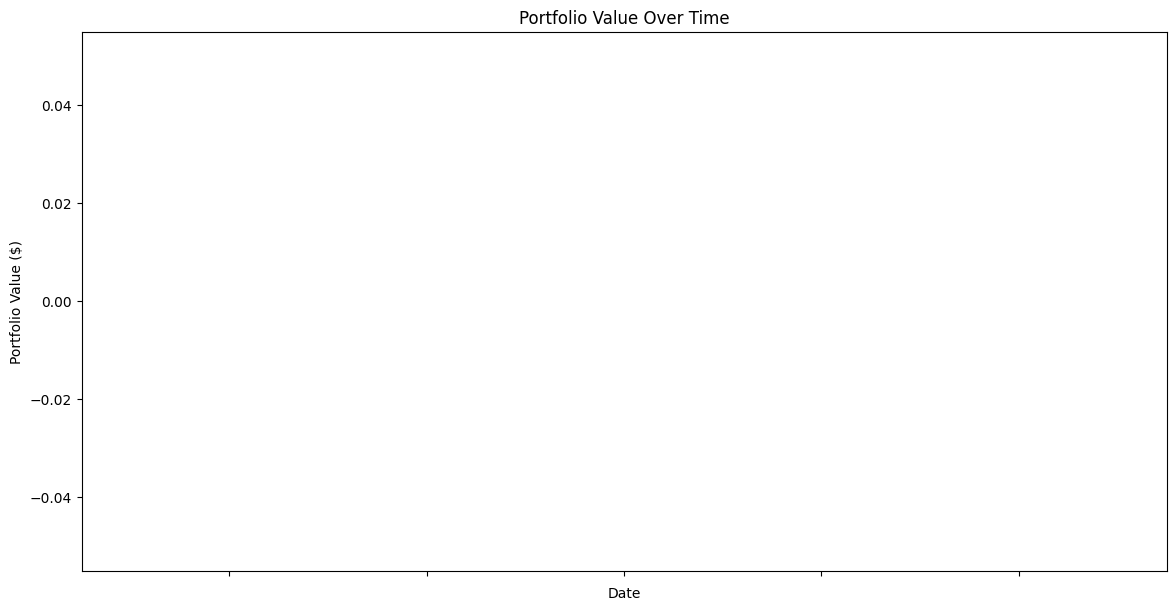

IndexError: single positional indexer is out-of-bounds

In [134]:
import yfinance as yf
import datetime
import pandas as pd

stocks = ['CEG', 'NVDA', 'AVGO', 'AMD', 'RVPH', 'LLY']
#stocks = ['INTC']
# Step 3: Fetch historical data for backtesting
start_date = "2021-01-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')
data = {stock: yf.download(stock, start=start_date, end=end_date, interval='15m') for stock in stocks}

# Step 4: Define indicators using pandas
def calculate_indicators(df):
    df['50_MA'] = df['Close'].rolling(window=50).mean()
    df['200_MA'] = df['Close'].rolling(window=200).mean()
    
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    return df

data = {stock: calculate_indicators(df) for stock, df in data.items()}

# Step 5: Define trading strategy with long, short, and hold positions
def trading_signal(df):
    signals = []
    
    for i in range(len(df)):
        if df['50_MA'].iloc[i] > df['200_MA'].iloc[i] and df['RSI'].iloc[i] < 40:
            signals.append('Buy')
        elif df['50_MA'].iloc[i] < df['200_MA'].iloc[i] and df['RSI'].iloc[i] > 60:
            signals.append('Sell')
        else:
            signals.append('Hold')
    
    df['Signal'] = signals
    return df

data = {stock: trading_signal(df) for stock, df in data.items()}

# Step 6: Implement Backtesting Logic
def backtest_strategy(data, initial_cash=10000):
    portfolio_value = initial_cash
    positions = {stock: 0 for stock in stocks}
    portfolio_values = []
    cash = initial_cash
    
    for date in data[stocks[0]].index:  # Iterate through each date
        for stock in stocks:
            df = data[stock]
            signal = df.loc[date, 'Signal']
            price = df.loc[date, 'Close']
            
            if signal == 'Buy' and cash > 0:
                amount_to_invest = cash * 0.05  # 5% of cash
                shares_to_buy = amount_to_invest // price
                cost = shares_to_buy * price
                positions[stock] += shares_to_buy
                cash -= cost
                print(f"Buying {shares_to_buy} shares of {stock} at {price} on {date}")
            
            elif signal == 'Sell' and positions[stock] > 0:
                shares_to_sell = positions[stock]
                revenue = shares_to_sell * price
                positions[stock] = 0
                cash += revenue
                print(f"Selling {shares_to_sell} shares of {stock} at {price} on {date}")
        
        # Calculate current portfolio value
        portfolio_value = cash + sum(positions[stock] * data[stock].loc[date, 'Close'] for stock in stocks)
        portfolio_values.append(portfolio_value)
    
    portfolio_df = pd.DataFrame({'Date': data[stocks[0]].index, 'Portfolio Value': portfolio_values})
    portfolio_df.set_index('Date', inplace=True)
    
    return portfolio_df

# Step 7: Run Backtest
portfolio_df = backtest_strategy(data)

# Step 8: Evaluate Performance
import matplotlib.pyplot as plt

portfolio_df['Portfolio Value'].plot(figsize=(14, 7))
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.show()

# Calculate total return
total_return = (portfolio_df['Portfolio Value'].iloc[-1] / portfolio_df['Portfolio Value'].iloc[0]) - 1
print(f"Total Return: {total_return * 100:.2f}%")


In [139]:
stocks = ['NVDA', 'AVGO', 'AMD', 'ASTS', 'ARM']

# Step 3: Fetch historical data for initial indicators calculation
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = {stock: yf.download(stock, start=start_date, end=end_date) for stock in stocks}

# Step 4: Define indicators using pandas
def calculate_indicators(df):
    df['50_MA'] = df['Close'].rolling(window=50).mean()
    df['200_MA'] = df['Close'].rolling(window=200).mean()
    
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    return df

data = {stock: calculate_indicators(df) for stock, df in data.items()}

# Step 5: Define trading strategy with long, short, and hold positions
def trading_signal(df):
    signals = []
    
    for i in range(len(df)):
        if df['50_MA'].iloc[i] > df['200_MA'].iloc[i] and df['RSI'].iloc[i] < 40:
            signals.append('Buy')
        elif df['50_MA'].iloc[i] < df['200_MA'].iloc[i] and df['RSI'].iloc[i] > 60:
            signals.append('Sell')
        else:
            signals.append('Hold')
        
        print(f"Date: {df.index[i]}, 50_MA: {df['50_MA'].iloc[i]}, 200_MA: {df['200_MA'].iloc[i]}, RSI: {df['RSI'].iloc[i]}, Signal: {signals[-1]}")
    
    df['Signal'] = signals
    return df

data = {stock: trading_signal(df) for stock, df in data.items()}

# Step 6: Fetch latest data, calculate signals, and place trades with Alpaca
def fetch_latest_data(stock):
    return yf.download(stock, period='200d', interval='1d')

def place_order(stock, side, notional):
    try:
        order = api.submit_order(
            symbol=stock,
            notional=notional,
            side=side,
            type='market',
            time_in_force='day'  # Fractional orders must be DAY orders
        )
        print(f"{side.capitalize()} order placed for ${notional:.2f} of {stock}.")
    except Exception as e:
        print(f"Error placing {side} order for {stock}: {e}")

# Step 7: Implement a risk management strategy using notional amount
def get_trade_notional(stock):
    balance = float(api.get_account().cash)
    risk_per_trade = balance * 0.05  # Risking 5% of the available cash per trade
    return max(1.00, round(risk_per_trade, 2))  # Ensure at least $1.00 is used per trade

def is_market_open():
    clock = api.get_clock()
    return clock.is_open

def trade():
    if not is_market_open():
        print("Market is closed. No trades will be placed.")
        return
    
    for stock in stocks:
        df = fetch_latest_data(stock)
        df = calculate_indicators(df)
        latest_signal = trading_signal(df)
        
        print(f"Checking signals for {stock}:")
        print(latest_signal[['Signal']].tail())

        notional = get_trade_notional(stock)
        last_signal = latest_signal['Signal'].iloc[-1]
        
        if last_signal == 'Buy':
            print(f"Buy signal detected for {stock}. Placing buy order.")
            place_order(stock, 'buy', notional)
        elif last_signal == 'Sell':
            print(f"Sell signal detected for {stock}. Placing sell order.")
            place_order(stock, 'sell', notional)
        else:
            print(f"Hold signal detected for {stock}. No action taken.")

# Step 8: Automate trading - Check every minute
while True:
    trade()
    time.sleep(60)  # Wait 60 seconds before checking again


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date: 2015-01-02 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-05 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-06 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-07 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-08 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-09 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-12 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-13 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-14 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-15 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-16 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-20 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-21 00:00:00, 50_MA: nan, 200_MA: nan, RSI: nan, Signal: Hold
Date: 2015-01-22 00:00:00

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NVDA']: YFInvalidPeriodError("%ticker%: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


Checking signals for NVDA:
Empty DataFrame
Columns: [Signal]
Index: []


IndexError: single positional indexer is out-of-bounds